## Unwrapping error correction - phase closure - characteristics ##

+ Figure 3 - Characteristics of phase-unwrapping errors in a interferograms triplet.

In [1]:
%matplotlib inline
import os
import sys
import numpy as np
from matplotlib import pyplot as plt, ticker
from matplotlib.gridspec import GridSpec
from mintpy.defaults.plot import *
from mintpy.objects import ifgramStack
from mintpy.utils import readfile, writefile, plot as pp, utils as ut
from mintpy.unwrap_error_phase_closure import calc_num_nonzero_integer_closure_phase

work_dir = os.path.expanduser('~/data/Galapagos/GalapagosSenDT128/mintpy')
os.chdir(work_dir)
print('Go to directory: '+work_dir)

Go to directory: /Users/yunjunz/data/Galapagos/GalapagosSenDT128/mintpy


### Figure 3a-c. Closure phase of one interferogram triplet

In [2]:
## calculate the closure phase and its integer ambiguity

idx_closure = 23

ifgram_file = os.path.join(work_dir, 'inputs/ifgramStack.h5')
mask_file   = os.path.join(work_dir, 'waterMask.h5')
mask = readfile.read(mask_file)[0]

stack_obj = ifgramStack(ifgram_file)
stack_obj.open(print_msg=False)
length, width = stack_obj.length, stack_obj.width
ref_y, ref_x = stack_obj.refY, stack_obj.refX
date12_list = stack_obj.date12List
C = ifgramStack.get_design_matrix4triplet(date12_list)
print('number of interferograms: {}'.format(C.shape[1]))
print('number of triplets: {}'.format(C.shape[0]))

idx_ifgs = np.where(C[idx_closure, :])[0]
ifgram = np.zeros((3, length, width), np.float32)
for i in range(3):
    dsName = 'unwrapPhase-{}'.format(date12_list[idx_ifgs[i]])
    print(dsName)
    data = readfile.read(ifgram_file, datasetName=dsName, print_msg=False)[0]
    data -= data[ref_y, ref_x]
    ifgram[i, :, :] = data

closure_phase = ifgram[0, :, :] - ifgram[1, :, :] + ifgram[2, :, :]
closure_phase[mask == 0] = np.nan
int_closure_phase = closure_phase - ut.wrap(closure_phase)
print('Done.')

number of interferograms: 490
number of triplets: 970
unwrapPhase-20150307_20150319
unwrapPhase-20150307_20150506
unwrapPhase-20150319_20150506
Done.


DESCENDING orbit -> flip left-right
save figure to file /Users/yunjunz/data/Galapagos/GalapagosSenDT128/mintpy/closure_phase_stats.png


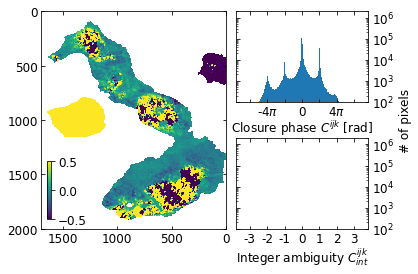

In [3]:
## plot

fig = plt.figure(figsize=(6, 4))
gs = GridSpec(nrows=2, ncols=5, figure=fig)
ax1 = fig.add_subplot(gs[:,:3])
ax2 = fig.add_subplot(gs[0,3:])
ax3 = fig.add_subplot(gs[1,3:])

# subplot 1
vlim = 0.5
im = ax1.imshow(closure_phase, cmap=plt.cm.get_cmap('viridis', lut=256), vmin=-1.*vlim, vmax=vlim)
# axis format
pp.auto_flip_direction(stack_obj.metadata, ax1)
ax1.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
ax1.set_ylim(length+0.5, 0.5)
ax1.yaxis.set_major_locator(ticker.LinearLocator(5))
# colorbar
cax = fig.add_axes([0.155, 0.16, 0.01, 0.2])
cbar = plt.colorbar(im, cax=cax, ticks=[-vlim, 0, vlim])
cbar.ax.tick_params(labelsize=font_size)
#cbar.set_label('Phase [rad]', fontsize=font_size, labelpad=-0.1)

# subplots 2 & 3
xmax = 24
bins = np.arange(-24.11, -0.1, 0.2).tolist() + np.arange(0.1, 24, 0.2).tolist()
ax2.hist(closure_phase[mask].flatten(),     range=(-1*xmax, xmax), bins=xmax*20, log=True);
ax3.hist(int_closure_phase[mask].flatten(), range=(-1*xmax, xmax), bins=bins,    log=True);

# axis format
for ax in [ax2, ax3]:
    ax.set_xlim([-xmax, xmax])
    ax.set_ylim([1e2, 2e6])
    ax.set_xticks([-6*np.pi, -4*np.pi, -2*np.pi, 0, 2*np.pi, 4*np.pi, 6*np.pi])
    ax.yaxis.tick_right()
    ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
    ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, numticks=15,
                                                 subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9)))
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)

#ax2.set_xticklabels([])
ax2.set_xticklabels(['', r'-4$\pi$', '', '0', '', r'4$\pi$', ''])
ax2.set_xlabel(r'Closure phase $C^{ijk}$ [rad]', fontsize=font_size, labelpad=0)
ax3.set_xticklabels(['-3', '-2', '-1', '0', '1', '2', '3'])
ax3.set_xlabel(r'Integer ambiguity $C^{ijk}_{int}$', fontsize=font_size, labelpad=0)
pp.set_shared_ylabel([ax2, ax3], '# of pixels', font_size=font_size, position='right', labelpad=1)
fig.subplots_adjust(wspace=0.03, hspace=0.4)

# output
out_file = os.path.join(work_dir, 'closure_phase_stats.png')
#plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()

### Backup: the integer ambiguity of the interferogram triplet above

DESCENDING orbit -> flip left-right
save figure to file /Users/yunjunz/data/Galapagos/GalapagosSenDT128/mintpy/int_closure_phase_stats.png


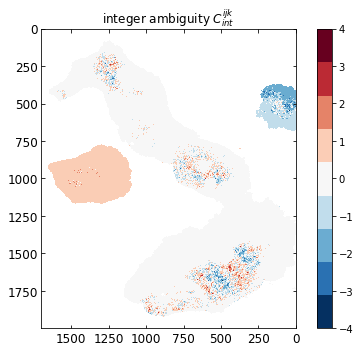

In [4]:
Nmax = 4
cmap = pp.ColormapExt('RdBu_r', cmap_lut=2*Nmax+1).colormap

# plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6, 5])
im = ax.imshow(int_closure_phase/(2.*np.pi), cmap=cmap, vmin=-4, vmax=4, interpolation='nearest')

# format
fig.colorbar(im, ax=ax)
pp.auto_flip_direction(stack_obj.metadata, ax)
ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)

ax.set_title(r'integer ambiguity $C_{int}^{ijk}$')
fig.tight_layout()

# output
outfig = os.path.join(work_dir, 'int_closure_phase_stats.png')
plt.savefig(outfig, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', outfig)
plt.show()

### Figure 3e-f. Number of non-zero integer ambiguity T_int

In [5]:
## calculation
num_file = os.path.join(work_dir, 'numNonzeroIntClosure.h5')
closure_int = calc_num_nonzero_integer_closure_phase(ifgram_file, mask_file=mask_file, update_mode=True)

# read data
num_closure_jump = np.array(readfile.read(num_file)[0], np.float32)
num_closure_jump[mask == 0] = np.nan
vmax = 750

output file "/Users/yunjunz/data/Galapagos/GalapagosSenDT128/mintpy/numNonzeroIntClosure.h5" already exists, skip re-calculating.


DESCENDING orbit -> flip left-right
save figure to file /Users/yunjunz/data/Galapagos/GalapagosSenDT128/mintpy/num_int_ambiguity.png


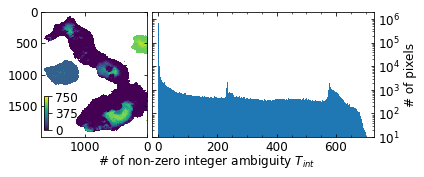

In [6]:
## plot

fig = plt.figure(figsize=(6, 2.3))
gs = GridSpec(nrows=1, ncols=3, figure=fig)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1:])

# axes 1 - map
im = ax1.imshow(num_closure_jump, cmap='viridis', vmin=0, vmax=vmax, interpolation='nearest')
pp.auto_flip_direction(stack_obj.metadata, ax1)
# colorbar
cax = fig.add_axes([0.135, 0.17, 0.01, 0.2])
cbar = plt.colorbar(im, cax=cax, ticks=[0, vmax/2, vmax])
cbar.ax.tick_params(labelsize=font_size)
#cbar.set_label('Phase [rad]', fontsize=font_size, labelpad=-0.1)

# axes 2 - histogram
ax2.hist(num_closure_jump[~np.isnan(num_closure_jump)].flatten(), range=(0, vmax), log=True, bins=vmax)
# axis format
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_xlim(-20,vmax-20)
ax2.set_ylim(1e1, 2e6)
pp.set_shared_xlabel([ax1, ax2], r'# of non-zero integer ambiguity $T_{int}$', labelpad=-0.03, font_size=font_size, position='bottom')
#ax2.set_xlabel('# of non-zero integer ambiguity', fontsize=font_size)
ax2.set_ylabel('# of pixels', fontsize=font_size)
ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax2.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, numticks=15, subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9)))
ax2.yaxis.set_minor_formatter(ticker.NullFormatter())
for ax in [ax1, ax2]:
    ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
fig.subplots_adjust(wspace=0.03)

# save
out_fig = os.path.join(work_dir, 'num_int_ambiguity.png')
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', out_fig)
plt.show()